In [12]:
# Rudimentary setup
import sys
assert sys.version_info >= (3, 7)

In [13]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [14]:
# Define some default font-sizes and figure settings
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=16)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

creating the `images/training_linear_models` folder & defining the `save_fig()` function for use

In [15]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1) <u>Linear Regression</u>
- Until now → Did most of the work without having a "solid" understanding on how to do this
- Need to know what is under the hood (***determine the appropriate model, the right training algorithm, and idyllic hyperparameters***)

- Staring off, time to look at the `linear regression model` & **2** ways to train it
1. Using a `closed-form equation` → <u>Only **finite** numbers of constants, variables, and standard operations (no ∞-sums, no limits, no integrals)</u>
    - It will directly compute the model parameters that best fit the model to the training set

2. Using an *iterative-optimization approach* called the `gradient descent` → <u>Gradually tweaks model parameters to minimize the cost-function over the training set and eventually **converges to the same set of parameters as the first method**</u>
    - Gonna check-out some variants of **GD** For ***neural-networks*** (ex: Btach GF, mini-batch GD, and stochastic GD)
    - To begin, time to do `polynomial regression` → **more complex model that can fit nonlinear datasets & is prone to overfitting

### 1a) <u>Linear Regression Equations</u>
1. Example from ch.1 was: <u>*life_satisfaction = Θ₀ + Θ₁ x GDP_per_capita*</u>
    - simply a ***linear fxn of input-feature GDP_per_capita*** || **Θ₀ and Θ₁ are the model's parameters**

2. Generally, a linear model makes a predict by <u>Computing a weighted sum of the input features, plus a constant called the *bias term* (aka, *intercept term* aka the **b** in **y = mx + b**)</u>

    - *Equation 4-1. <u>Linear Regression Model Prediction</u>*
    - *ŷ = Θ₀ + Θ₁x₁ + Θ₂x₂ + ••• + Θₙxₙ*
        - ***ŷ*** == predicted value
        - ***n*** == number of features
        - ***xᵢ*** == the *iᵗʰ* feature value
        - ***Θᵢ*** == the *iᵗʰ* model parameter, including the bias term *Θ₀*, and the feature weights *Θ₁,Θ₂,•••, Θₙ*


3. Can be re-written as...

    - *Equation 4-2. <u>Linear regression model prediction (vectorized form)*</u>
    - *ŷ = h***₀(x)** == **Θ • x** 
        - ***h₀*** == hypothesis function, using model parameters **Θ**
        - ***Θ*** == the model's *parameter vector*, including the *bias term Θ₀* and the feature weights *Θ₁ to Θₙ*
        - ***x*** == the instance's *feature vector*, containing *x₀ to xₙ*, with x₀ always equal to 1
        - **Θ • x** == the dot product of the vectors **Θ** and **x**, which is equal to *Θ₀x₀ + Θ₁x₁ + Θ₂x₂ + ... + Θₙxₙ*


4. Best way to train it is by using the **Root Mean Squared Error (RMSE)**
    - It is simpler to minimize the **mean quared error (MSE)** than the RMSE → leads to the same result

5. The MSE of a linear regression hypothesis *h<sub>Θ</sub>* on training set 󠁘**Ｘ** is calculated using Equation 4-3
    - *Equation 4-3. <u>MSE cost function for a linear regression model</u>*
    - $\mathrm{MSE}(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^m \left( \boldsymbol{\theta}^\mathsf{T} \mathbf{x}^{(i)} - y^{(i)} \right)^2$


### 1b) <u>The Normal Equation</u>
- `Normal Equation` ⇒ <u>A *closed-form solution* used to find the value of **Θ** that minimizes the MSE (a math equation that gives the result directly)</u>

    - *Equation 4-4. Normal equation*
    - $\hat{\boldsymbol{\theta}} = (\mathbf{X}^\mathsf{T} \mathbf{X})^{-1} \mathbf{X}^\mathsf{T} \mathbf{y}$
    
        - $\hat{\boldsymbol{\theta}}$ == the value of ${\boldsymbol{\theta}}$ tjat minimizes the cost function
        - **y** == the vector of target values containing $\mathbf{y}^{(1)}$ to $\mathbf{y}^{(m)}$

In [16]:
# Implementing some linear-looking data to test the equation on
import numpy as np

np.random.seed(42)
m: int = 100                                 # Number of instances
X: np.ndarray = 2 * np.random.rand(m,1)              # X = [0, 2]
y: np.ndarray = 4 + 3 * X + np.random.randn(m,1)     # y = 4 + 3x + Gaussian noise

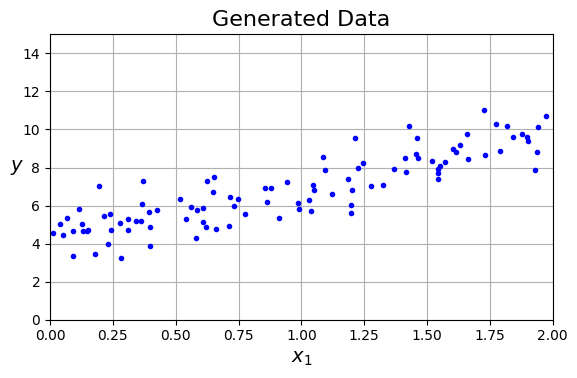

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")                # blue dots
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)       # rotation=0 makes the label horizontal
plt.axis([0, 2, 0, 15])
plt.grid()
plt.title("Generated Data")
save_fig("generated_data_plot")
plt.show()

2. Computing $\hat{\boldsymbol{\theta}}$ using the **Normal Equation**
    - Using the `inv()` function from ***NumPy's*** linear algebra module `np.linalg` to compute the inverse of a matrix ⇒ THEN the `dot()` method for matrix multiplication

In [18]:
from sklearn.preprocessing import add_dummy_feature

X_b: np.ndarray = add_dummy_feature(X)  # add x0 = 1 to each instance // simply adds a column of 1s at position X[0]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    # Dot product of X_b transpose and X_b → Inverse it → Dot product with X_b transpose and y → Dot product Inverse w/ X_b.T @ y

**Note:** the `@` operator performs matrix multiplication & cannot be used on pure Python arrays (i.e. list of lists)
- @ == `dot product`

In [50]:
# Showing some examples
from scipy import linalg

print(f"First three of Feature-grid 'X': \n{X_b[:3]}\t shape = {X_b[:3].shape}")
print(f"\nFirst 3 of target (labels): \n{y[:3]}\t shape = {y[:3].shape}")
print(f"\nTranspose of X: \n{X_b[:3].T}\t shape = {X_b[:3].T.shape}")

# Dotproducts
print(f"\nInverse of Transpose 'X' * orignal 'X' \n{np.linalg.inv(X_b.T @ X_b)}\t shape = {np.linalg.inv(X_b.T @ X_b).shape}") 

Xty = X_b.T @ y
print(f"\nDot product of Transpose-X and target vector y:\n{Xty}\t shape = {Xty.shape}")

print(f"\nTheta_best = (X_b.T @ X_b)^-1 @ (X_b.T @ y):\n{theta_best}\t shape = {theta_best.shape}")

First three of Feature-grid 'X': 
[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]]	 shape = (3, 2)

First 3 of target (labels): 
[[6.33428778]
 [9.40527849]
 [8.48372443]]	 shape = (3, 1)

Transpose of X: 
[[1.         1.         1.        ]
 [0.74908024 1.90142861 1.46398788]]	 shape = (2, 3)

Inverse of Transpose 'X' * orignal 'X' 
[[ 0.03523199 -0.02683222]
 [-0.02683222  0.02853394]]	 shape = (2, 2)

Dot product of Transpose-X and target vector y:
[[682.00041001]
 [738.40825805]]	 shape = (2, 1)

Theta_best = (X_b.T @ X_b)^-1 @ (X_b.T @ y):
[[4.21509616]
 [2.77011339]]	 shape = (2, 1)


3. Seeing as how the original equation is ***"y = 4 + 3x₁ + Gaussian noise"***, the ideal outcome would have been $\mathbf{\theta_{0}} = 4$ and $\mathbf{\theta_{1}} = 3$ and not $\mathbf{\theta_{0}} = 4.215$ and $\mathbf{\theta_{1}} = 2.770$
    - We can now make predictions using $\hat{\boldsymbol{\theta}}$

In [51]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

4. visualizing the predictions

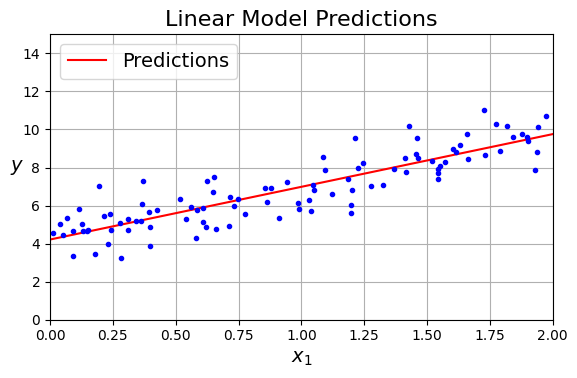

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.title("Linear Model Predictions")
save_fig("linear_model_predictions_plot")

plt.show()

5. Performing ***Linear Regression*** from SK-Learn from Here

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_       # bias term/y-intercept && Slope/coefficient weight in "y = Θ_0 + x_1 * Θ_1"

(array([4.21509616]), array([[2.77011339]]))